In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sewar

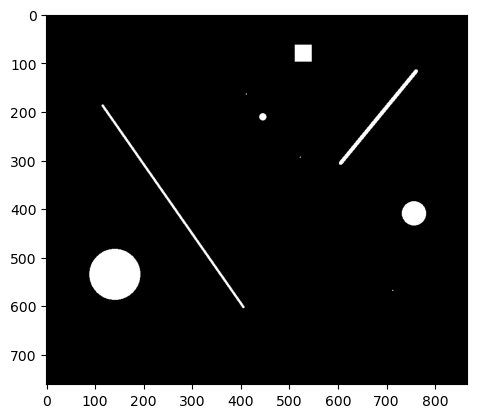

In [2]:
img = cv2.imread('./images/inpainting.png')
mask = cv2.imread('./images/inpainting_maska4.png')
_, mask_th = cv2.threshold(mask, 254, 255, cv2.THRESH_BINARY)
mask_8bit = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
plt.imshow(mask_8bit, cmap = 'gray');

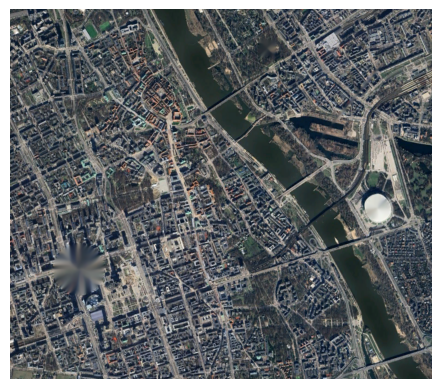

In [3]:
res_ns = cv2.inpaint(img, mask_8bit, 10, cv2.INPAINT_NS)
res_ns_rgb = cv2.cvtColor(res_ns, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(res_ns_rgb);

In [4]:
SSIM1 = []
PSNR1 = []
for i in range(50):
    res_ns = cv2.inpaint(img, mask_8bit, i, cv2.INPAINT_NS)
    ssim_m = sewar.ssim(img, res_ns)[0]
    psnr_m = sewar.psnr(img, res_ns)
    SSIM1.append(ssim_m)
    PSNR1.append(psnr_m)

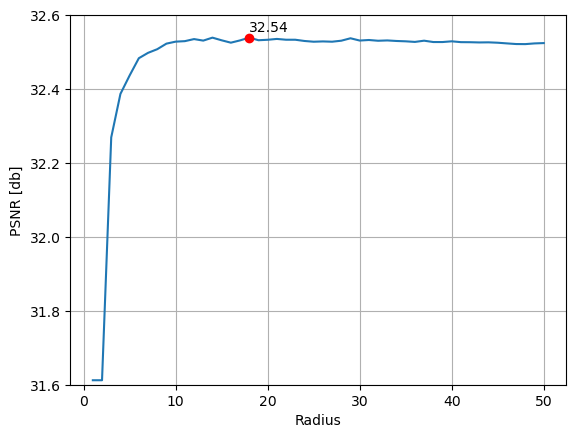

In [6]:
x = range(1,51)
plt.plot(x, PSNR1)
plt.plot(np.array(PSNR1).argmax()+1, np.array(PSNR1).max(), 'o', markeredgecolor="red", markerfacecolor="red")
plt.text(np.array(PSNR1).argmax()+1 , np.array(PSNR1).max()+ 0.015, str(np.array(np.around(PSNR1, 2)).max()))
plt.grid()
plt.ylim(31.6, 32.6)
plt.xlabel("Radius")
plt.ylabel("PSNR [db]")
plt.show()

In [9]:
np.argmax(PSNR1)

17

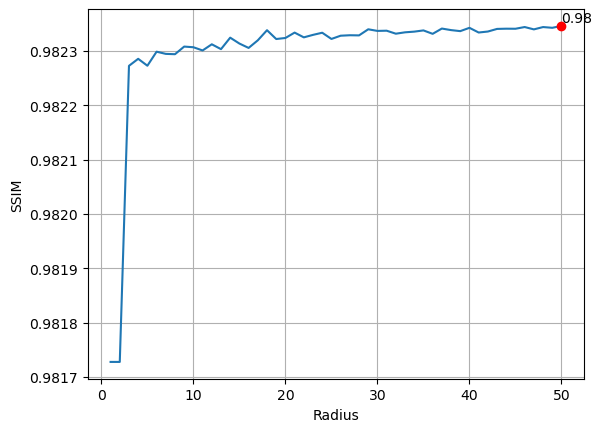

In [7]:
x = range(1,51)
plt.plot(x, SSIM1)
plt.plot(np.array(SSIM1).argmax()+1, np.array(SSIM1).max(), 'o', markeredgecolor="red", markerfacecolor="red")
plt.text(np.array(SSIM1).argmax() +1, np.array(SSIM1).max()+ 0.000007, str(np.array(np.around(SSIM1, 2)).max()))
plt.grid()
# plt.ylim(0.98154, 0.98192)
plt.xlabel("Radius")
plt.ylabel("SSIM")
plt.show()

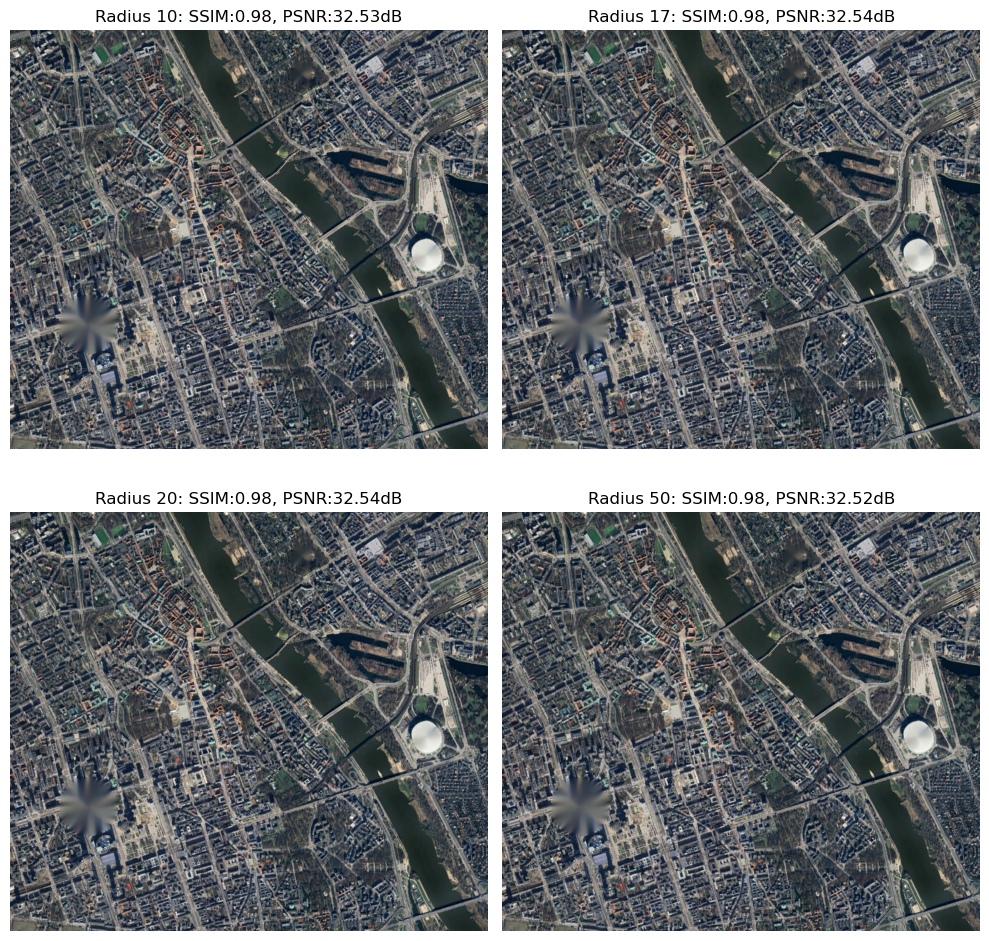

In [12]:
R = [10, 17, 20, 50]

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    res_ns = cv2.inpaint(img, mask_8bit, R[i], cv2.INPAINT_NS)
    res_ns_rgb = cv2.cvtColor(res_ns, cv2.COLOR_BGR2RGB)
    
    ssim_m = sewar.ssim(img, res_ns)[0]
    psnr_m = sewar.psnr(img, res_ns)
    
    plt.axis('off')
    plt.title(f'Radius {R[i]}: SSIM:{np.around(ssim_m, 2)}, PSNR:{np.around(psnr_m, 2)}dB')
    plt.imshow(res_ns_rgb)
    
plt.tight_layout()